In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import ml_metrics as metrics

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [7]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [8]:
from lightgbm import LGBMClassifier

lgb_10k = LGBMClassifier()
lgb_11k = LGBMClassifier()
lgb_12k = LGBMClassifier()
lgb_13k = LGBMClassifier()
lgb_14k = LGBMClassifier()
lgb_15k = LGBMClassifier()

In [9]:
lgb_10k.fit(X_train_new_10k, Y_train_new_10k)
lgb_11k.fit(X_train_new_11k, Y_train_new_11k)
lgb_12k.fit(X_train_new_12k, Y_train_new_12k)
lgb_13k.fit(X_train_new_13k, Y_train_new_13k)
lgb_14k.fit(X_train_new_14k, Y_train_new_14k)
lgb_15k.fit(X_train_new_15k, Y_train_new_15k)

LGBMClassifier()

In [10]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [11]:
Y_test_pred_10k = lgb_10k.predict(X_test_new_10k)
Y_test_pred_proba_10k = lgb_10k.predict_proba(X_test_new_10k)
Y_test_pred_11k = lgb_11k.predict(X_test_new_11k)
Y_test_pred_proba_11k = lgb_11k.predict_proba(X_test_new_11k)
Y_test_pred_12k = lgb_12k.predict(X_test_new_12k)
Y_test_pred_proba_12k = lgb_12k.predict_proba(X_test_new_12k)
Y_test_pred_13k = lgb_13k.predict(X_test_new_13k)
Y_test_pred_proba_13k = lgb_13k.predict_proba(X_test_new_13k)
Y_test_pred_14k = lgb_14k.predict(X_test_new_14k)
Y_test_pred_proba_14k = lgb_14k.predict_proba(X_test_new_14k)
Y_test_pred_15k = lgb_15k.predict(X_test_new_15k)
Y_test_pred_proba_15k = lgb_15k.predict_proba(X_test_new_15k)

In [12]:
print(Y_test_pred_proba_10k)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.34857282e-03 6.80208195e-06 1.53411500e-03 ... 1.41488756e-03
  1.89480766e-02 2.64830572e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [13]:
accuracy_10k = accuracy_score(Y_test_new_10k, Y_test_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, Y_test_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, Y_test_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, Y_test_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, Y_test_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, Y_test_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.055204815739245336
Accuracy 0.06605242668050869
Accuracy 0.05988168537969335
Accuracy 0.05319614711033275
Accuracy 0.06915275074275176
Accuracy 0.08878443661052357


In [14]:
map_10k = mean_average_precision(Y_test_new_10k, Y_test_pred_proba_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, Y_test_pred_proba_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, Y_test_pred_proba_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, Y_test_pred_proba_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, Y_test_pred_proba_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, Y_test_pred_proba_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.10895610042578181
Mean Average Precision@5 0.1286940911843585
Mean Average Precision@5 0.11625417521831863
Mean Average Precision@5 0.1046847635726795
Mean Average Precision@5 0.13739712461154938
Mean Average Precision@5 0.13634068851460154


In [15]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

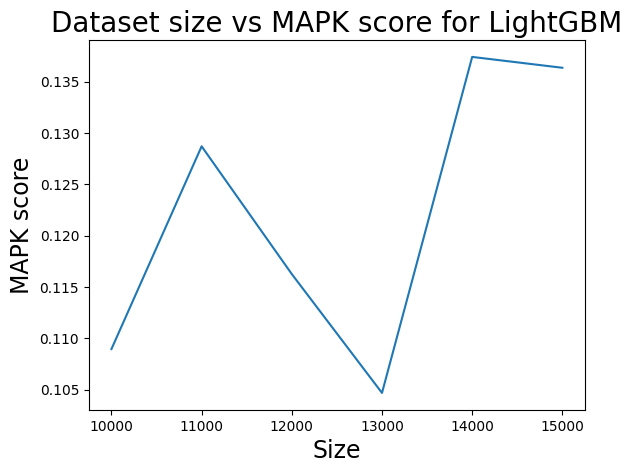

In [16]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for LightGBM",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()